Dataset Shape: (1599, 12)

First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9

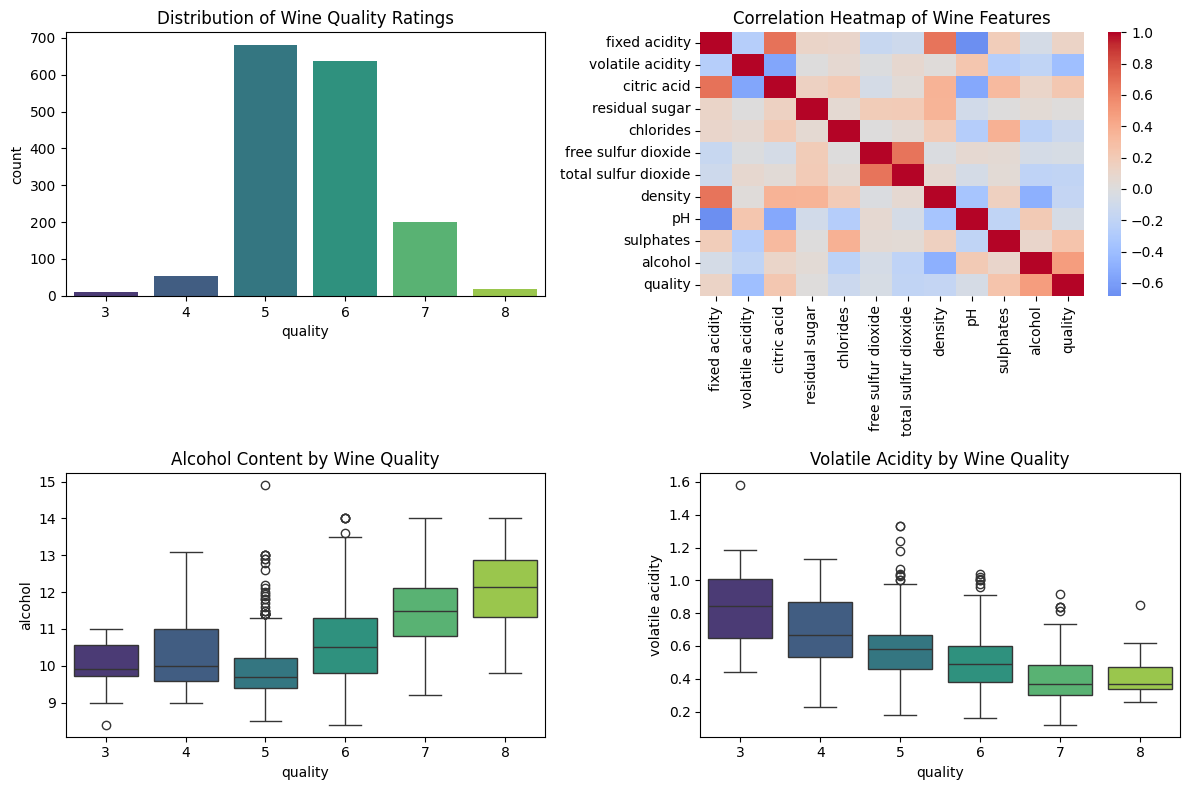


Binary Quality Distribution:
quality_binary
0    1382
1     217
Name: count, dtype: int64

Model Accuracy: 0.8938

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.70      0.37      0.48        43

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320



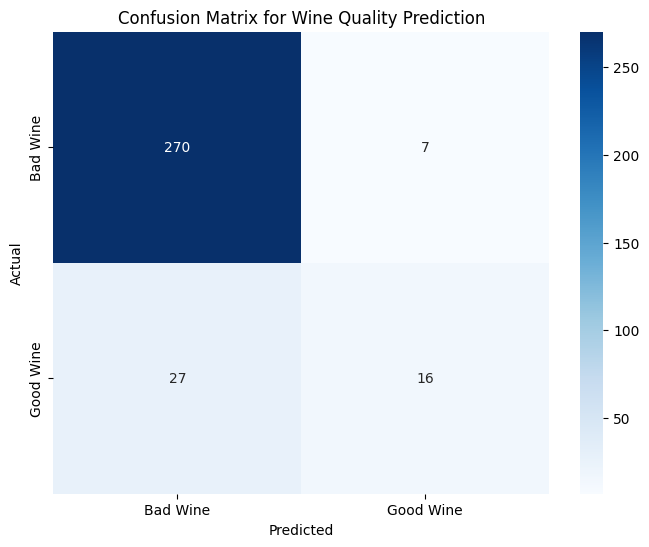

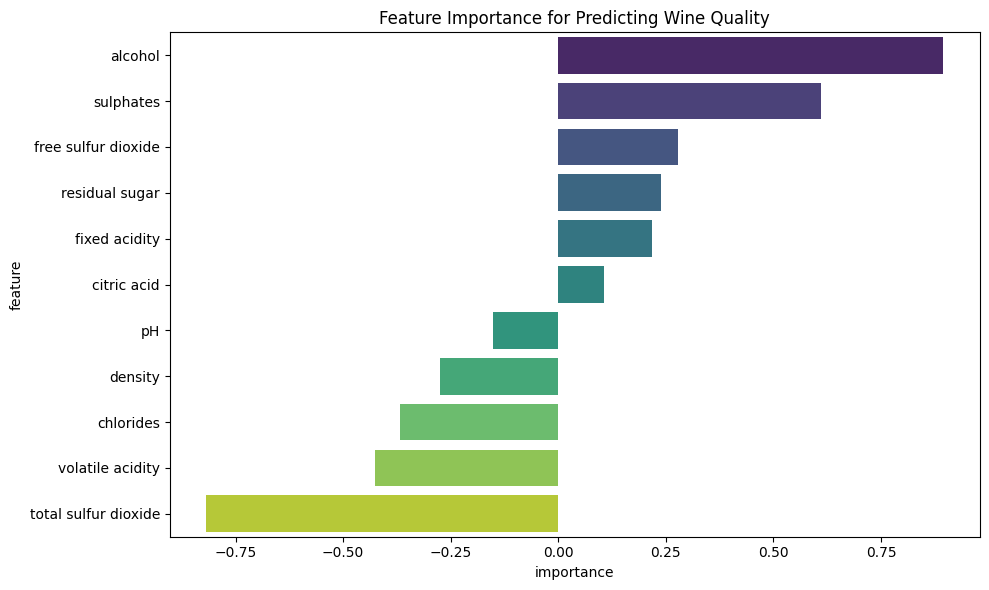


Feature Importance:
                 feature  importance
10               alcohol    0.894439
9              sulphates    0.611095
5    free sulfur dioxide    0.277333
3         residual sugar    0.238700
0          fixed acidity    0.217720
2            citric acid    0.105375
8                     pH   -0.151717
7                density   -0.275453
4              chlorides   -0.367764
1       volatile acidity   -0.425676
6   total sulfur dioxide   -0.817437

Sample Wine Prediction: Bad Wine
Prediction Probability: 0.0074
Actual Quality: 5.0 (Bad Wine)


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (using red wine data)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(url, sep=';')

# Display basic information about the dataset
print("Dataset Shape:", wine_df.shape)
print("\nFirst 5 rows of the dataset:")
print(wine_df.head())
print("\nDataset Information:")
print(wine_df.info())
print("\nSummary Statistics:")
print(wine_df.describe())
print("\nQuality Distribution:")
print(wine_df['quality'].value_counts().sort_index())

# Visualize the dataset
plt.figure(figsize=(12, 8))

# Distribution of wine quality
plt.subplot(2, 2, 1)
sns.countplot(x='quality', data=wine_df, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')

# Correlation heatmap
plt.subplot(2, 2, 2)
correlation_matrix = wine_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Wine Features')

# Relationship between alcohol content and quality
plt.subplot(2, 2, 3)
sns.boxplot(x='quality', y='alcohol', data=wine_df, palette='viridis')
plt.title('Alcohol Content by Wine Quality')

# Relationship between volatile acidity and quality
plt.subplot(2, 2, 4)
sns.boxplot(x='quality', y='volatile acidity', data=wine_df, palette='viridis')
plt.title('Volatile Acidity by Wine Quality')

plt.tight_layout()
plt.savefig('wine_visualizations.png')
plt.show()

# Preprocess the data
# Convert quality into binary classification (good wine vs bad wine)
# We'll consider wine with quality >= 7 as good (1), and < 7 as bad (0)
wine_df['quality_binary'] = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Check class distribution
print("\nBinary Quality Distribution:")
print(wine_df['quality_binary'].value_counts())

# Separate features and target
X = wine_df.drop(['quality', 'quality_binary'], axis=1)
y = wine_df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Wine Quality Prediction')
plt.savefig('confusion_matrix.png')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': log_reg.coef_[0]
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Predicting Wine Quality')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("\nFeature Importance:")
print(feature_importance)

# Test with a sample prediction
sample_wine = X.iloc[0:1]  # Take the first wine as a sample
sample_wine_scaled = scaler.transform(sample_wine)
prediction = log_reg.predict(sample_wine_scaled)
prediction_proba = log_reg.predict_proba(sample_wine_scaled)

print(f"\nSample Wine Prediction: {'Good Wine' if prediction[0] == 1 else 'Bad Wine'}")
print(f"Prediction Probability: {prediction_proba[0][1]:.4f}")
print(f"Actual Quality: {wine_df.iloc[0]['quality']} ({'Good Wine' if wine_df.iloc[0]['quality_binary'] == 1 else 'Bad Wine'})")